In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [44]:
# import dataset

df = pd.read_csv('../../Dataset/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

In [45]:
df


,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,1,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

In [47]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 


In [48]:
y_predicted = rf.predict(X_test)

In [49]:
accuracy_score(y_test, y_predicted)

0.95

In [51]:
cm = confusion_matrix(y_test, y_predicted)

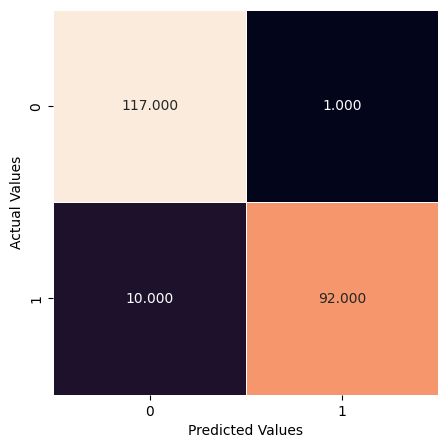

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [53]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       118
           1       0.99      0.90      0.94       102

    accuracy                           0.95       220
   macro avg       0.96      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220



In [54]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 94.09 %
Standard Deviation: 2.58 %
